In [1]:
import csv
import multiprocessing
import os
import random
import shutil
import time

import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from solver.simulated_annealing import SimulatedAnnealing
from solver.max_weighted_cnf import MaxWeightedCNF
from solver.optimum import Optimum

In [3]:
DATA_SUITES = (
    'wuf20-71',
    'wuf20-71R',
    'wuf20-91',
    'wuf20-91R',
    'wuf50-200',
    'wuf50-218',
    'wuf50-218R',
    'wuf75-325',
    'wuf100-430',
)

DATA_SUITES_VARIATIONS = (
    'M',
    'N',
    'Q',
    'R',
)

In [4]:
DATA_DIRECTORY = 'data'
OUTPUT_DIRECTORY = 'output'
BACKUP_DIRECTORY = 'backup'

In [5]:
# RUNS = 1
#
# def flatten(list):
#     return [item for sublist in list for item in sublist]
#
# if not os.path.exists(BACKUP_DIRECTORY):
#     os.mkdir(BACKUP_DIRECTORY)
# BACKUP_TIMESTAMP = time.time().__str__()
#
# if os.path.exists(OUTPUT_DIRECTORY):
#     shutil.copytree(OUTPUT_DIRECTORY, os.path.join(BACKUP_DIRECTORY, BACKUP_TIMESTAMP))
#     shutil.rmtree(OUTPUT_DIRECTORY)
# os.mkdir(OUTPUT_DIRECTORY)
#
# for suite in DATA_SUITES:
#     os.mkdir(os.path.join(OUTPUT_DIRECTORY, suite))
#
#     for suite_variation in DATA_SUITES_VARIATIONS:
#         print(suite, suite_variation)
#
#         os.mkdir(os.path.join(OUTPUT_DIRECTORY, suite, suite_variation))
#         sa_output = open(os.path.join(OUTPUT_DIRECTORY, suite, suite_variation, 'sa.csv'), 'w')
#
#         sa_heading = ['instance', 'weight', 'satisfied_clauses', 'clauses',
#                       'true_variables', 'variables', 'current_objective_history', 'best_objective_history']
#         sa_writer = csv.writer(sa_output)
#
#         sa_writer.writerow(sa_heading)
#
#         optimum = None
#         optimum_path = os.path.join(DATA_DIRECTORY, suite, f'{suite}-{suite_variation}-opt.dat')
#
#         if os.path.exists(optimum_path):
#             optimum = Optimum(optimum_path)
#
#         for root, _, files in os.walk(os.path.join(DATA_DIRECTORY, suite, f'{suite}-{suite_variation}')):
#             sas = flatten([
#                 [
#                     SimulatedAnnealing(
#                         MaxWeightedCNF(os.path.join(root, file))
#                     )
#                 ] * RUNS for file in files
#             ])
#
#             pool = multiprocessing.Pool(processes=8)
#
#             sa_results = list(tqdm(pool.imap(run_simulated_annealing, sas), total=len(sas)))
#
#             sa_results = [(result[0].split('/')[-1],
#                            result[1], result[2], result[3], result[4],
#                            result[5], result[6], result[7]) for result in sa_results]
#
#             sa_results.sort(key=lambda result: result[0])
#
#             sa_writer.writerows(sa_results)

In [6]:
suite = 'wuf50-218'
suite_variation = 'M'
instance = 'wuf50-01.mwcnf'

_, weight, satisfied_clauses, clauses, true_variables, variables, current_objective_history, best_objective_history =\
    SimulatedAnnealing(
        MaxWeightedCNF(os.path.join(DATA_DIRECTORY, suite, f'{suite}-{suite_variation}', instance))
    ).run(record_history=True)

optimum_path = os.path.join(DATA_DIRECTORY, suite, f'{suite}-{suite_variation}-opt.dat')
optimum = Optimum(optimum_path)

optimal_weight = optimum.optimal_weight(instance[1:].rstrip('.mwcnf'))

optimal_weight, weight, satisfied_clauses, clauses, true_variables, variables

(20150, 20150, 218, 218, 25, 51)

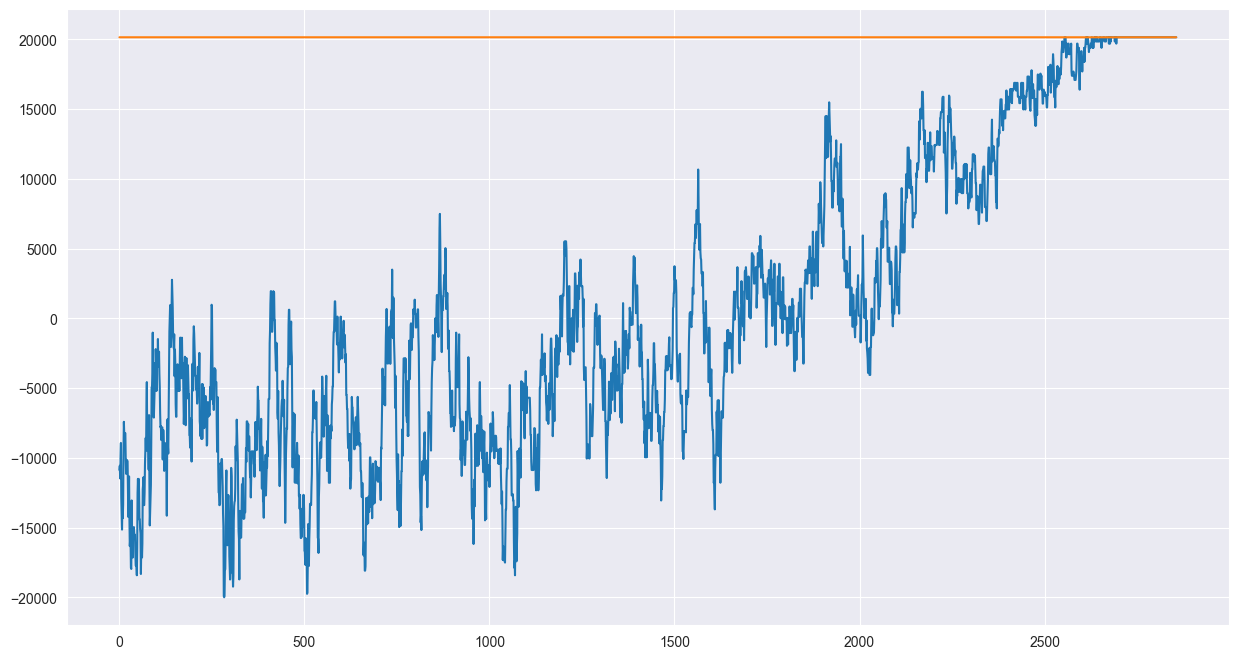

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(data=current_objective_history)
sns.lineplot(data=[optimal_weight] * len(current_objective_history))
plt.show()